In [ ]:
# A script that will visualize the training variables used to train the HeavyHiggs classifier

from matplotlib import pyplot as plt
import h5py
import numpy
import os
import numpy as np

plt.rcParams['text.usetex'] = True
signal = "./signal.h5"
background = "./background.h5"

In [ ]:
def create_subfigure_permutations(rows, columns):
    '''
    A function that will create the location of all of the subplots for easy looping
    '''
    fig_permutations = []
    for r in range(rows):
        fig_permutations.extend([(r,j) for j in range(columns)]) 
    return fig_permutations

def determine_bins(sig_arr, bkg_arr, nbins):
    min_value = min(min(sig_arr), min(bkg_arr))
    max_value = max(max(sig_arr), max(bkg_arr))
    
    bin_edges = np.linspace(min_value, max_value, nbins + 1)

    return bin_edges


In [ ]:
# Begin Analysis
# Open the signal and background hdf5 files
sig = h5py.File(signal, 'r')
bkg = h5py.File(background, 'r')

# Understand how imbalanced the classes are
print("Signal samples: {}".format(len(sig["class_labels"])))
print("Background samples: {}".format(len(bkg["class_labels"])))

<KeysViewHDF5 ['class_labels', 'leading_tau_energy', 'leading_tau_eta', 'leading_tau_phi', 'leading_tau_pt', 'subleading_tau_energy', 'subleading_tau_eta', 'subleading_tau_phi', 'subleading_tau_pt', 'total_met']>
[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]


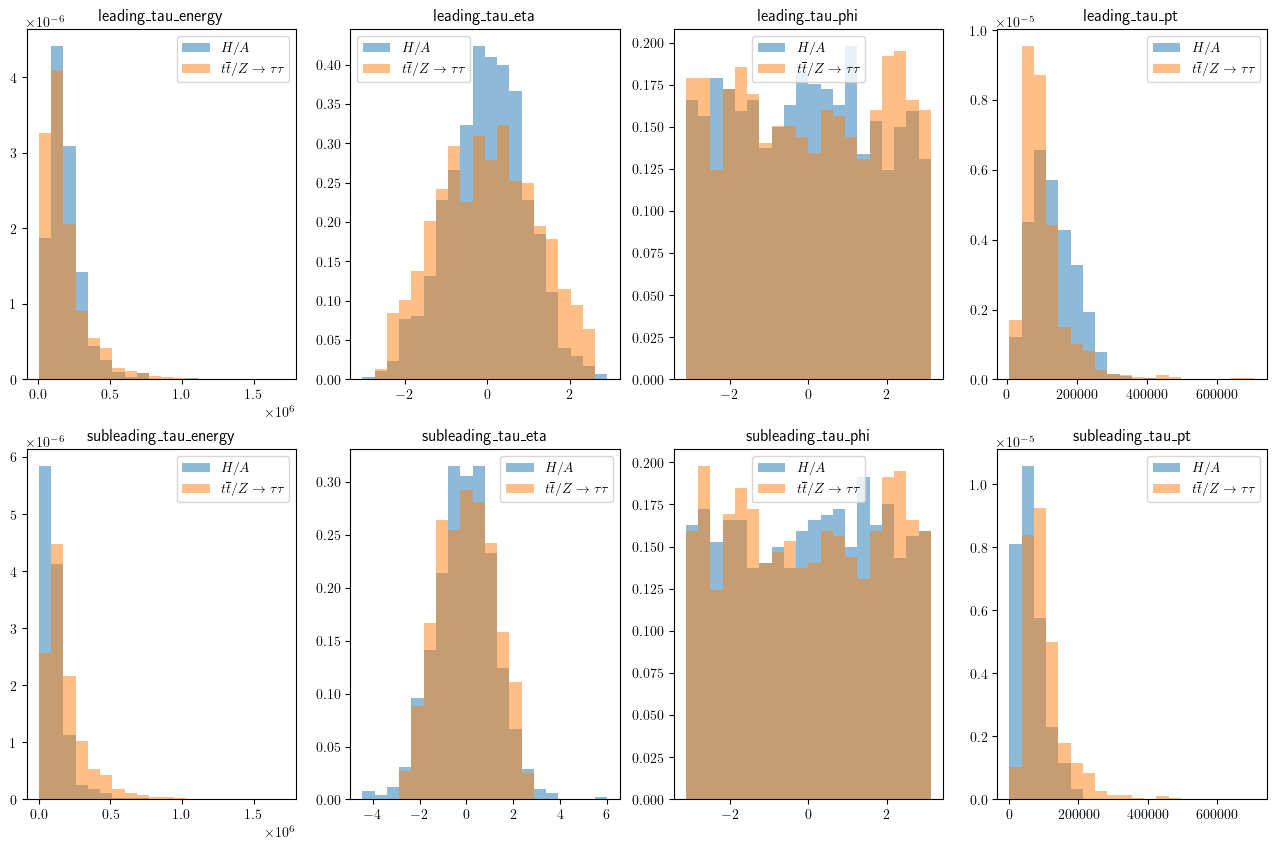

In [18]:

# Revealing the keys to allow for the plotting of all of the variables
print(sig.keys())

# Defining the list of available training variables to plot
variable_list = ['leading_tau_energy', 'leading_tau_eta', 'leading_tau_phi', 
                 'leading_tau_pt', 'subleading_tau_energy', 'subleading_tau_eta', 
                 'subleading_tau_phi', 'subleading_tau_pt']

# Creating an appropriate number of subplots to visualize the data
fig, ax = plt.subplots(2,4, figsize=(16, 10)) 

# Creating the tuples that will correspond to each of the subplots for easy selection when plotting
fig_permutations = create_subfigure_permutations(2,4)
print(fig_permutations)


# Normalize plots to emphasize the shape of the distributions
# normalize = False
normalize = True
nbins = 20



# Plot the training features using matplotlib
for subplot, var in zip(fig_permutations,  ):
    sig_arr = sig[var]
    bkg_arr = bkg[var]
    bin_arr = determine_bins(sig_arr, bkg_arr, nbins)
    ax[subplot[0],subplot[1]].set_title(var)
    ax[subplot[0],subplot[1]].hist(sig_arr, bins=bin_arr, density=normalize, alpha=.5, label="$H/A$")
    ax[subplot[0],subplot[1]].hist(bkg_arr, bins=bin_arr, density=normalize, alpha=.5, label="$t\\overline{t}$/$Z\\rightarrow\\tau\\tau$")
    ax[subplot[0],subplot[1]].legend()

# Save the figure for later reference
fig.savefig("training_variables.png")

